In [309]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings

filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [310]:
df= pd.read_csv("Houses.csv")
display(df.head(2))
print(df.shape)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


(1460, 81)


In [311]:
df.drop(["Id"],axis=1,inplace=True)

In [312]:
pd.DataFrame({"Dtypes": df.dtypes, "Num_Uniq": df.nunique()}).T

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Dtypes,int64,object,float64,int64,object,object,object,object,object,object,object,object,object,object,object,object,int64,int64,int64,int64,object,object,object,object,object,float64,object,object,object,object,object,object,object,int64,object,int64,int64,int64,object,object,object,object,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,object,int64,object,int64,object,object,float64,object,int64,int64,object,object,object,int64,int64,int64,int64,int64,int64,object,object,object,int64,int64,int64,object,object,int64
Num_Uniq,15,5,110,1073,2,2,4,4,2,5,3,25,9,8,5,8,10,9,112,61,6,8,15,16,3,327,4,5,6,4,4,4,6,637,6,144,780,721,6,5,2,5,753,417,24,861,4,3,4,3,8,4,4,12,7,4,5,6,97,3,5,441,5,5,3,274,202,120,20,76,8,3,4,4,21,12,5,9,6,663


In [313]:
cols_to_change = ['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'PoolArea', 'MoSold', 'YrSold', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
df[cols_to_change] = df[cols_to_change].astype("category")
pd.DataFrame({"Dtypes": df.dtypes, "Num_Uniq": df.nunique()}).T

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Dtypes,category,category,float64,int64,category,category,category,category,category,category,category,category,category,category,category,category,category,category,int64,int64,category,category,category,category,category,float64,category,category,category,category,category,category,category,int64,category,int64,int64,int64,category,category,category,category,int64,int64,int64,int64,category,category,category,category,category,category,category,int64,category,category,category,category,float64,category,category,int64,category,category,category,int64,int64,int64,int64,int64,category,category,category,category,int64,category,category,category,category,int64
Num_Uniq,15,5,110,1073,2,2,4,4,2,5,3,25,9,8,5,8,10,9,112,61,6,8,15,16,3,327,4,5,6,4,4,4,6,637,6,144,780,721,6,5,2,5,753,417,24,861,4,3,4,3,8,4,4,12,7,4,5,6,97,3,5,441,5,5,3,274,202,120,20,76,8,3,4,4,21,12,5,9,6,663


In [314]:
#df.info()

In [315]:
df.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,SalePrice
count,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,6.517808,1978.506164,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,43.489041,180921.195890
std,24.284752,9981.264932,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,1.625393,24.689725,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,496.123024,79442.502883
min,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,2.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,59.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,5.000000,1961.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,6.000000,1980.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,80.000000,11601.500000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,7.000000,2002.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,14.000000,2010.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,15500.000000,755000.000000


In [316]:
null = df.isnull().sum()
null_ratio = null / df.shape[0]
pd.DataFrame({"Null": null, "Null_ratio": null_ratio}).T

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Null,0.0,0.0,259.000000,0.0,0.0,1369.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,872.00000,8.000000,0.0,0.0,0.0,37.000000,37.000000,38.000000,37.000000,0.0,38.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,690.000000,81.000000,81.000000,81.000000,0.0,0.0,81.000000,81.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1453.000000,1179.000000,1406.000000,0.0,0.0,0.0,0.0,0.0,0.0
Null_ratio,0.0,0.0,0.177397,0.0,0.0,0.937671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.59726,0.005479,0.0,0.0,0.0,0.025342,0.025342,0.026027,0.025342,0.0,0.026027,0.0,0.0,0.0,0.0,0.0,0.0,0.000685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.472603,0.055479,0.055479,0.055479,0.0,0.0,0.055479,0.055479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.995205,0.807534,0.963014,0.0,0.0,0.0,0.0,0.0,0.0


In [317]:
#unique_values.append((columns, df[columns].unique().tolist()))

In [318]:
df_uniques = {}
for i in df.columns: 
    df_uniques[i] = df[i].unique()
df_uniques

{'MSSubClass': [60, 20, 70, 50, 190, ..., 80, 160, 75, 180, 40]
 Length: 15
 Categories (15, int64): [20, 30, 40, 45, ..., 120, 160, 180, 190],
 'MSZoning': ['RL', 'RM', 'C (all)', 'FV', 'RH']
 Categories (5, object): ['C (all)', 'FV', 'RH', 'RL', 'RM'],
 'LotFrontage': array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
         91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
         74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
         81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
         77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
         92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
         67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
         87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
         38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
        114., 128., 149., 313., 168., 182., 138., 160., 152., 12

In [319]:
#df_uniques = []
#for i in df.columns: 
     #df_uniques.append((column, df["MiscFeature"].unique().tolist()))

#df_uniques

In [320]:
df.drop(["Alley","MasVnrType","FireplaceQu","PoolQC","Fence","MiscFeature"],axis=1,inplace=True)

In [321]:
null = df.isnull().sum()
null_ratio = null / df.shape[0]
pd.DataFrame({"Null": null, "Null_ratio": null_ratio}).T

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Null,0.0,0.0,259.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.000000,0.0,0.0,0.0,37.000000,37.000000,38.000000,37.000000,0.0,38.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81.000000,81.000000,81.000000,0.0,0.0,81.000000,81.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Null_ratio,0.0,0.0,0.177397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005479,0.0,0.0,0.0,0.025342,0.025342,0.026027,0.025342,0.0,0.026027,0.0,0.0,0.0,0.0,0.0,0.0,0.000685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055479,0.055479,0.055479,0.0,0.0,0.055479,0.055479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [322]:
c2 = "BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 GarageType GarageFinish GarageQual GarageCond".split()
modes = dict(df[c2].mode().iloc[0])

In [323]:
df.fillna(modes, inplace=True)

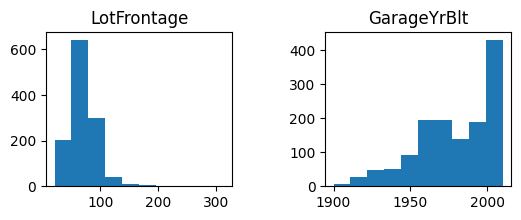

In [324]:
plt.figure(figsize=(6, 2))

plt.subplot(1, 2, 1)
plt.title("LotFrontage")
plt.hist(df["LotFrontage"])

plt.subplot(1, 2, 2)
plt.title("GarageYrBlt")
plt.hist(df["GarageYrBlt"])

plt.subplots_adjust(wspace=.5)
plt.show()

In [325]:
num_cols = df.select_dtypes("number").columns.tolist()
cat_cols = df.select_dtypes("category").columns.tolist()

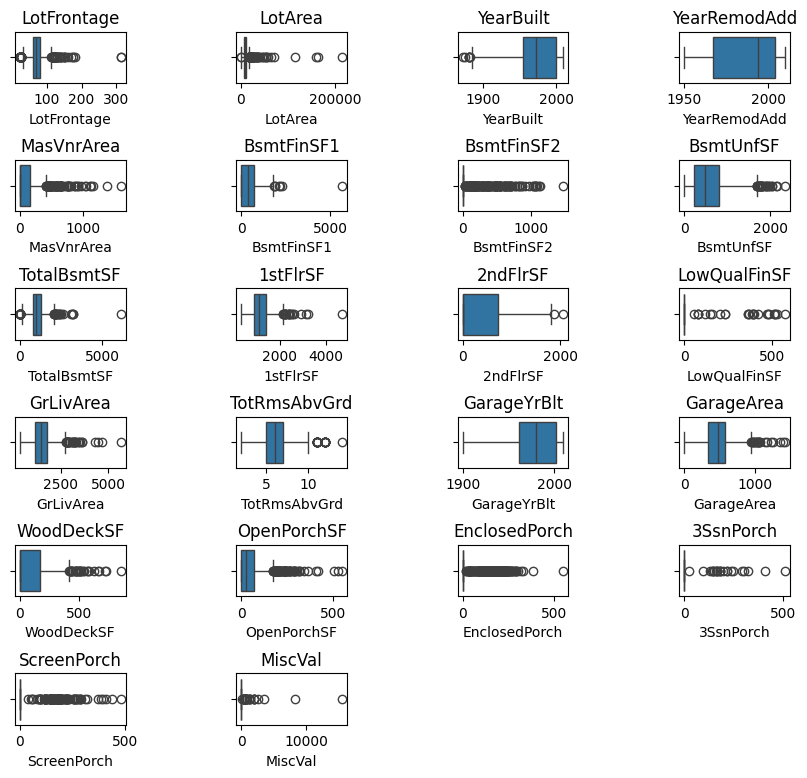

In [326]:
plt.figure(figsize=(10, 9))
for i, col in enumerate(num_cols[:-1]):
    plt.subplot(6, 4, i+1)
    plt.title(col)
    sns.boxplot(df[col], orient="h")
plt.subplots_adjust(wspace=1, hspace=1.5)
plt.show()

In [327]:
for col in num_cols[:-1]:
    Q1 = np.quantile(df[col], .25)
    Q3 = np.quantile(df[col], .75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    upper_outliers = df[df[col] > upper][col].values
    lower_outliers = df[df[col] < lower][col].values    
    df[col].replace(upper_outliers, upper, inplace=True)
    df[col].replace(lower_outliers, lower, inplace=True)

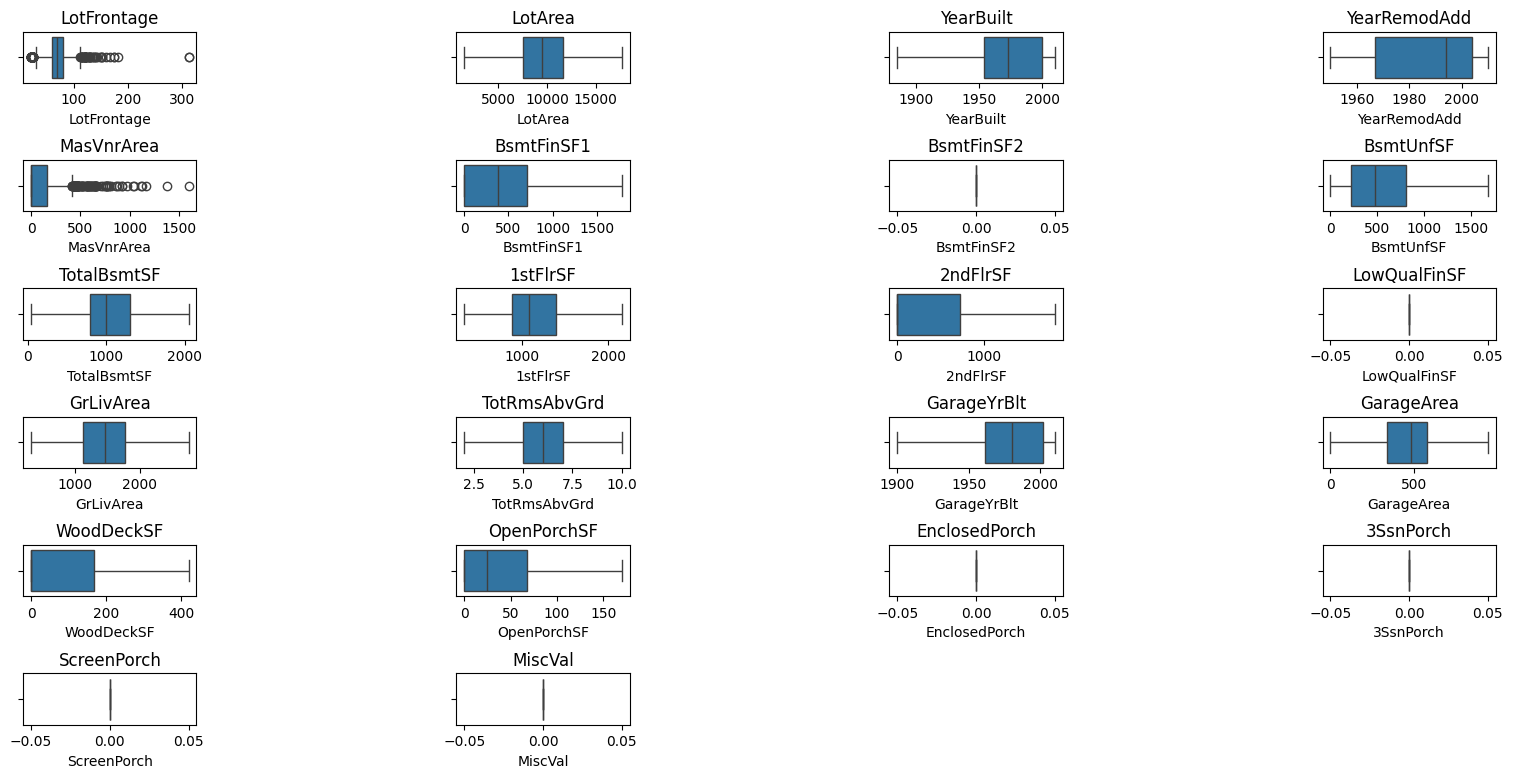

In [328]:
plt.figure(figsize=(19, 9))
for i, col in enumerate(num_cols[:-1]):
    plt.subplot(6, 4, i+1)
    plt.title(col)
    sns.boxplot(df[col], orient="h")
plt.subplots_adjust(wspace=1.5, hspace=1.5)
plt.show()

In [329]:
for col in cat_cols:
    mode = df[col].mode()[0]
    vc = df[col].value_counts()

    categories = vc.index.to_numpy()
    counts = vc.values

    outliers = categories[counts <= 10]

    df[col].replace(outliers, mode, inplace=True)

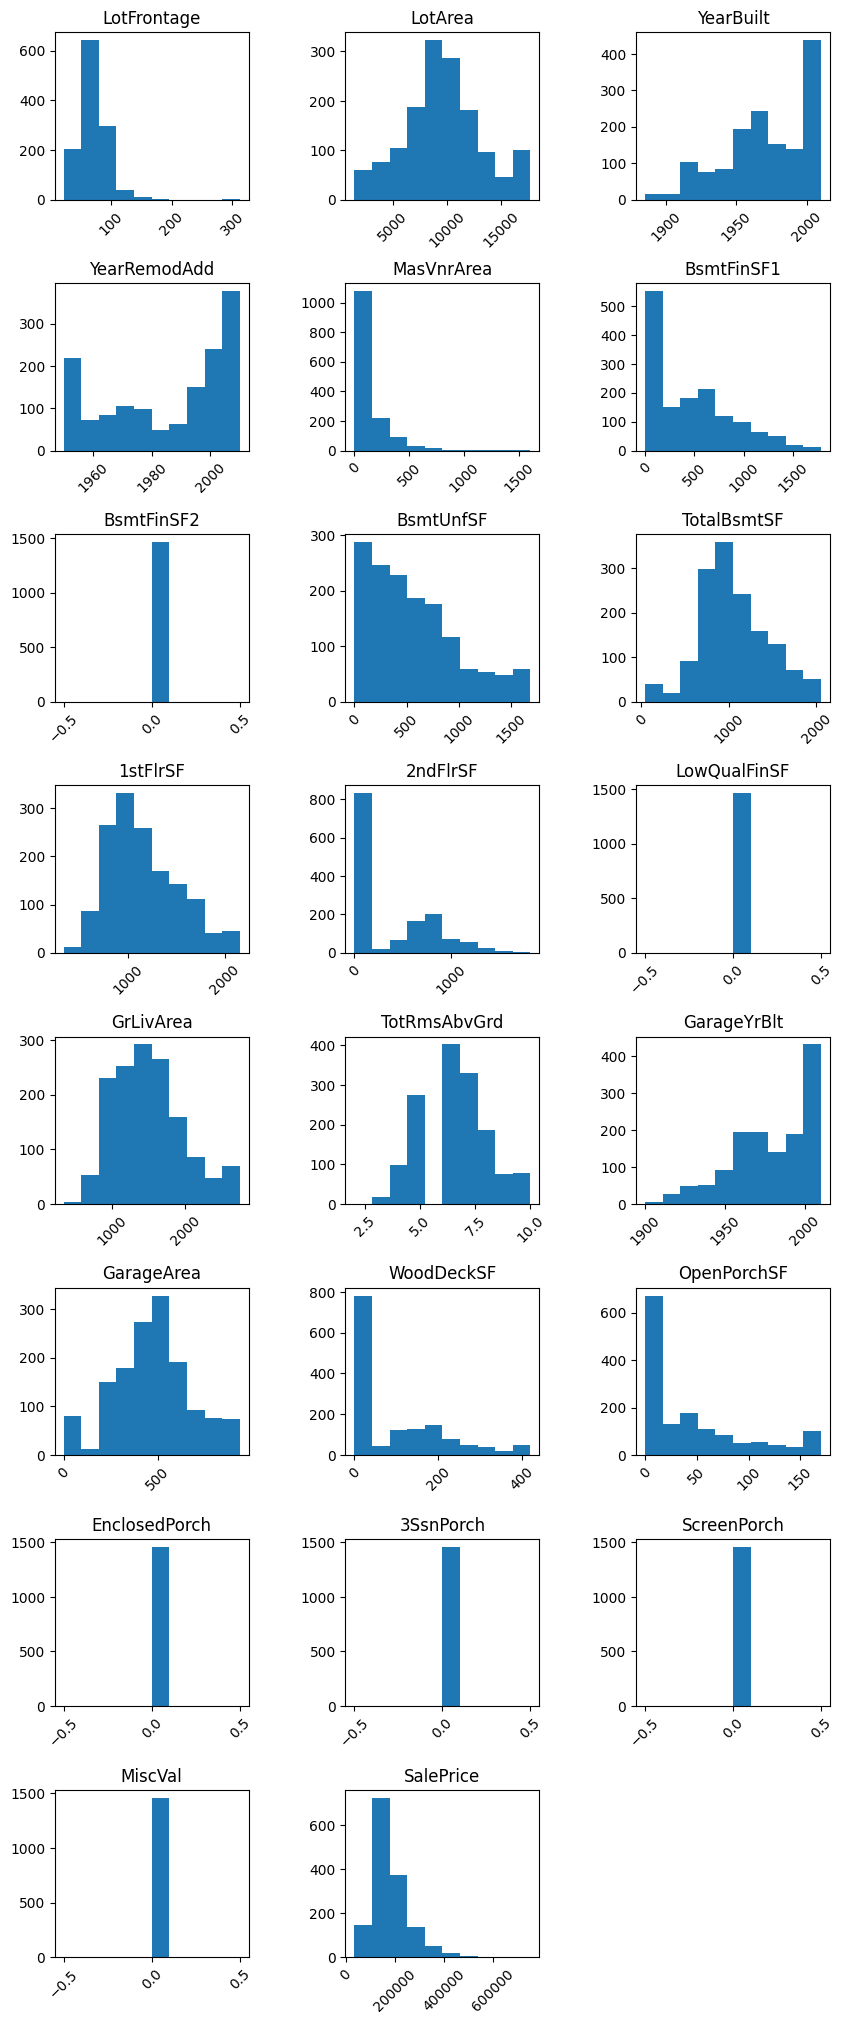

In [330]:
plt.figure(figsize=(10, 25))
for i, col in enumerate(num_cols):
    plt.subplot(8, 3, i+1)
    plt.title(col)
    plt.xticks(rotation=45)
    plt.hist(df[col])
plt.subplots_adjust(wspace=.5, hspace=.5)
plt.show()

In [331]:
!pip install seaborn

In [332]:
!python -m pip install --upgrade python


ERROR: Could not find a version that satisfies the requirement python (from versions: none)
ERROR: No matching distribution found for python


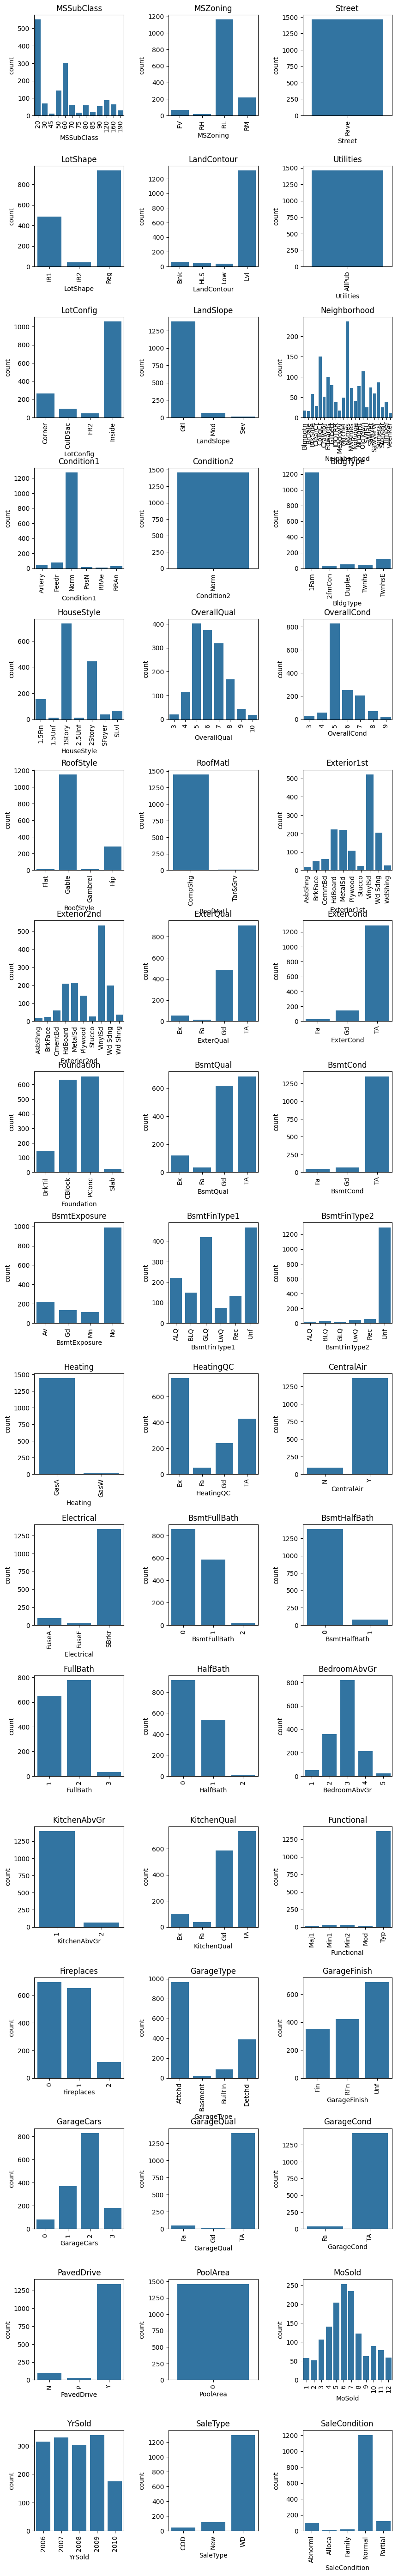

In [333]:
plt.figure(figsize=(10, 75))
for i, col in enumerate(cat_cols):
    plt.subplot(18, 3, i+1)
    plt.title(col)
    plt.xticks(rotation=90)
    sns.countplot(x=col, data=df)
plt.subplots_adjust(wspace=.5, hspace=.5)
plt.show()

In [334]:
num_low_var_cols = ['LotArea', 'BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal']

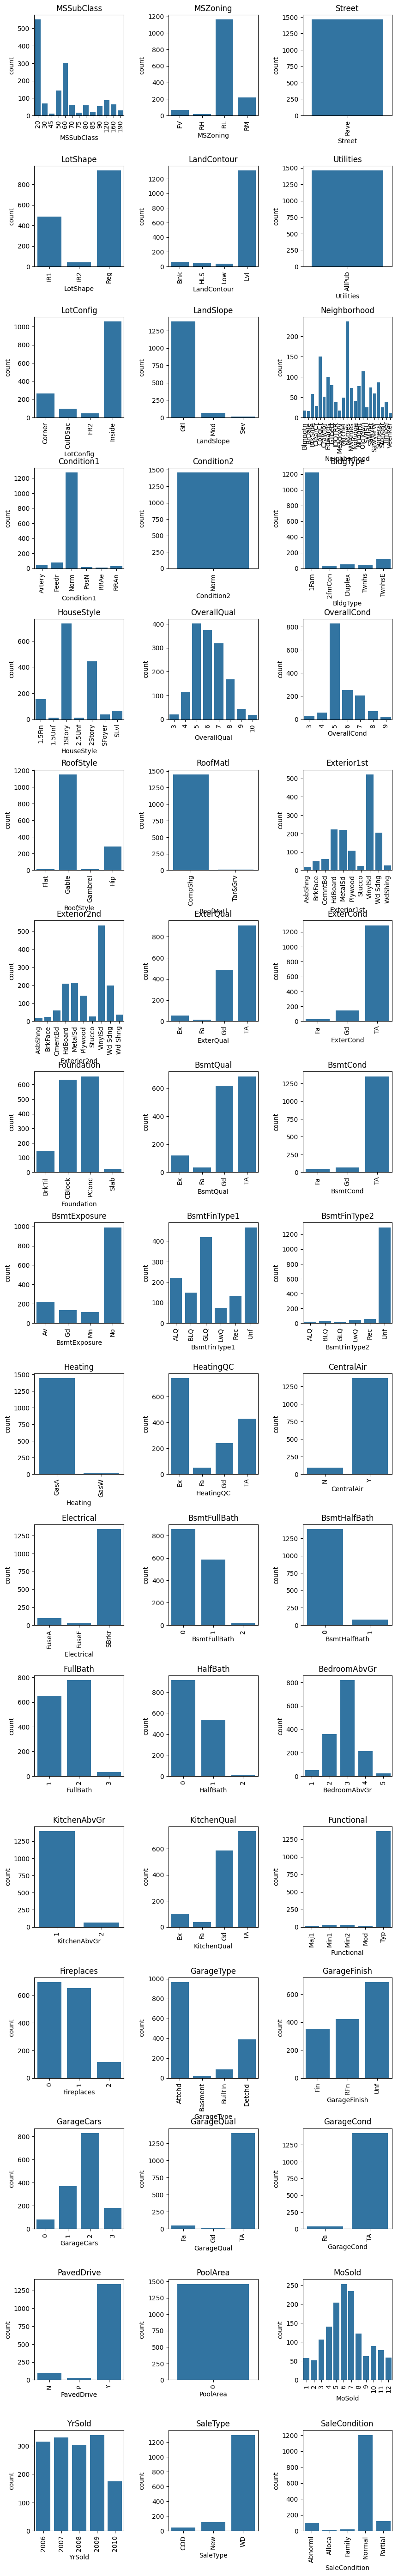

In [335]:
plt.figure(figsize=(10, 75))
for i, col in enumerate(cat_cols):
    plt.subplot(18, 3, i+1)
    plt.title(col)
    plt.xticks(rotation=90)
    sns.countplot(x=col, data=df)
plt.subplots_adjust(wspace=.5, hspace=.5)
plt.show()

In [336]:
cat_low_var_cols = ['MSSubClass', 'ExterCond', 'Street', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofMatl', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolArea', 'SaleType', 'SaleCondition']

In [337]:
num_low_var_cols = ['LotArea', 'BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal']

In [338]:
low_var_cols = num_low_var_cols + cat_low_var_cols
df.drop(low_var_cols, axis=1, inplace=True)

In [339]:
df.duplicated().sum()

np.int64(0)

In [340]:
X, y = df.iloc[:, :-1], df.iloc[:, -1:]

In [341]:
from sklearn.preprocessing import MinMaxScaler


In [342]:
num_cols = X.select_dtypes("number").columns 

scaler = MinMaxScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

In [343]:
ordinal_cols = ['ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'Foundation', 'GarageType', 'GarageFinish']

In [344]:
nominal_cols = ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd']
pd.DataFrame(X[nominal_cols].nunique()).T

,MSZoning,LotShape,LandContour,LotConfig,Neighborhood,HouseStyle,RoofStyle,Exterior1st,Exterior2nd
0,4,3,4,4,23,7,4,10,10


In [355]:
binary_cols = ['Neighborhood', 'HouseStyle', 'Exterior1st', 'Exterior2nd']
onehot_cols = ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'RoofStyle', 'MasVnrType']

In [356]:
labels = {
    'ExterQual': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0},
    'BsmtQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},  
    'BsmtExposure': {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0},
    'BsmtFinType1': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0},
    'HeatingQC': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0},
    'KitchenQual': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0},
    'Foundation': {'PConc': 4, 'CBlock': 3, 'BrkTil': 2, 'Slab': 1, 'Stone': 0},
    'GarageType': {'2Types': 6, 'Attchd': 5, 'Basment': 4, 'BuiltIn': 3, 'CarPort': 2, 'Detchd': 1, 'NA': 0},
    'GarageFinish': {'Fin': 3, 'RFn': 2, 'Unf': 1, 'NA': 0}
}

In [357]:
for col in ordinal_cols:
    X[col] = X[col].map(labels[col])

In [358]:
from category_encoders import OneHotEncoder

In [360]:
onehot_encoder = OneHotEncoder(cols=onehot_cols)
X = onehot_encoder.fit_transform(X)

ValueError: X does not contain the columns listed in cols

In [ ]:
from category_encoders import BinaryEncoder

In [352]:
binary_encoder = BinaryEncoder(cols=binary_cols)
X = binary_encoder.fit_transform(X)

In [354]:
X

,MSZoning,LotFrontage,LotShape,LandContour,LotConfig,Neighborhood_0,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,HouseStyle_0,HouseStyle_1,HouseStyle_2,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st_0,Exterior1st_1,Exterior1st_2,Exterior1st_3,Exterior2nd_0,Exterior2nd_1,Exterior2nd_2,Exterior2nd_3,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold
0,RL,0.150685,Reg,Lvl,Inside,0,0,0,0,1,0,0,1,7,5,0.944,0.883333,Gable,0,0,0,1,0,0,0,1,0.122500,3,4,4,1,6,0.396490,0.088994,0.404975,4,0.286636,0.469231,0.570097,1,2,1,3,3,0.750,0,5,0.936364,2,2,0.584066,0.000000,0.358824,2,2008
1,RL,0.202055,Reg,Lvl,FR2,0,0,0,1,0,0,1,0,6,8,0.728,0.433333,Gable,0,0,1,0,0,0,1,0,0.000000,2,3,4,4,5,0.549245,0.168496,0.606965,4,0.509575,0.000000,0.384484,0,2,0,3,2,0.500,1,5,0.690909,2,2,0.490274,0.709524,0.000000,5,2007
2,RL,0.160959,IR1,Lvl,Inside,0,0,0,0,1,0,0,1,7,5,0.928,0.866667,Gable,0,0,0,1,0,0,0,1,0.101250,3,4,4,2,6,0.272938,0.257490,0.436816,4,0.321779,0.475824,0.601585,1,2,1,3,3,0.500,1,5,0.918182,2,2,0.648015,0.000000,0.247059,9,2008
3,RL,0.133562,IR1,Lvl,Corner,0,0,0,1,1,0,0,1,7,5,0.240,0.333333,Gable,0,0,1,1,0,0,1,1,0.000000,2,2,3,1,5,0.121306,0.320380,0.355224,3,0.344293,0.415385,0.572997,1,1,0,3,3,0.625,1,1,0.890909,1,3,0.684253,0.000000,0.205882,2,2006
4,RL,0.215753,IR1,Lvl,FR2,0,0,1,0,0,0,0,1,8,5,0.920,0.833333,Gable,0,0,0,1,0,0,0,1,0.218750,3,4,4,3,6,0.367848,0.290715,0.548756,4,0.445329,0.578571,0.772282,1,2,1,4,3,0.875,1,5,0.909091,2,3,0.891021,0.457143,0.494118,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,0.140411,Reg,Lvl,Inside,1,0,0,1,0,0,0,1,6,5,0.912,0.833333,Gable,0,0,0,1,0,0,0,1,0.000000,2,4,4,1,1,0.000000,0.565411,0.453234,4,0.339900,0.381319,0.543995,0,2,1,3,2,0.625,1,5,0.900000,2,2,0.490274,0.000000,0.235294,8,2007
1456,RL,0.219178,Reg,Lvl,Inside,0,0,1,1,1,0,1,0,6,6,0.744,0.633333,Gable,1,0,0,0,0,1,0,1,0.074375,2,3,4,1,5,0.443664,0.349451,0.746269,2,0.954904,0.000000,0.720493,1,2,0,3,2,0.625,2,5,0.709091,1,2,0.532907,0.830952,0.000000,2,2010
1457,RL,0.154110,Reg,Lvl,Inside,0,0,0,1,1,0,0,1,7,9,0.448,0.933333,Gable,0,1,1,1,0,1,1,1,0.000000,4,4,3,1,6,0.154440,0.520320,0.552239,4,0.468941,0.632967,0.831115,0,2,0,4,3,0.875,2,5,0.372727,2,1,0.268585,0.000000,0.352941,5,2010
1458,RL,0.160959,Reg,Lvl,Inside,0,1,1,0,0,0,1,0,5,6,0.520,0.766667,Hip,0,0,1,0,0,0,1,0,0.000000,2,3,3,2,6,0.027518,0.000000,0.515423,3,0.408539,0.000000,0.308250,1,1,0,2,3,0.375,0,5,0.454545,1,1,0.255795,0.871429,0.000000,4,2010


In [353]:
print(X)

     MSZoning  LotFrontage LotShape LandContour LotConfig  Neighborhood_0  \
0          RL     0.150685      Reg         Lvl    Inside               0   
1          RL     0.202055      Reg         Lvl       FR2               0   
2          RL     0.160959      IR1         Lvl    Inside               0   
3          RL     0.133562      IR1         Lvl    Corner               0   
4          RL     0.215753      IR1         Lvl       FR2               0   
...       ...          ...      ...         ...       ...             ...   
1455       RL     0.140411      Reg         Lvl    Inside               1   
1456       RL     0.219178      Reg         Lvl    Inside               0   
1457       RL     0.154110      Reg         Lvl    Inside               0   
1458       RL     0.160959      Reg         Lvl    Inside               0   
1459       RL     0.184932      Reg         Lvl    Inside               1   

      Neighborhood_1  Neighborhood_2  Neighborhood_3  Neighborhood_4  \
0  